In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [204]:
data_df = pd.read_table('census+income/adult.data', delimiter=',', header=None)

In [205]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [206]:
test_df = pd.read_csv('census+income/adult.test')

In [207]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above-50k
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country

In [208]:
col_str = 'age workclass fnlwgt education education-num marital-status occupation relationship race sex capital-gain capital-loss hours-per-week native-country above-50k'
columns = col_str.split(' ')

In [209]:
columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'above-50k']

In [210]:
data_df.columns = columns

In [211]:
data_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above-50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [212]:
test_df = pd.read_csv('census+income/adult.test')

In [213]:
test_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above-50k
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [214]:
test_df.columns = columns

In [215]:
test_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above-50k
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [216]:
ddf = data_df[['education', 'above-50k']]
tdf = test_df[['education', 'above-50k']]

## Checking the values in 'above-50k'

In [217]:
ddf['above-50k'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [218]:
tdf['above-50k'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [219]:
boolify = {' <=50K': 0, ' >50K': 1}
ddf = ddf.replace({'above-50k': boolify})

In [220]:
boolify = {' <=50K.': 0, ' >50K.': 1}
tdf = tdf.replace({'above-50k': boolify})

In [221]:
ddf.head()

,education,above-50k
0,Bachelors,0
1,Bachelors,0
2,HS-grad,0
3,11th,0
4,Bachelors,0


In [222]:
tdf.head()

,education,above-50k
0,11th,0
1,HS-grad,0
2,Assoc-acdm,1
3,Some-college,1
4,Some-college,0


## Visualizing data

In [223]:
#saving this for later. I got this from the matplotlib.pyplot api and previously used it in a football analytics project
def fancy_chart(overall_ratios, labels, keys1, keys2, values1, values2, title1, title2):
    # make figure and assign axis objects
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 5))
    fig.subplots_adjust(wspace=0)

    # pie chart parameters
    # rotate so that first wedge is split by the x-axis
    angle = -180 * overall_ratios[0]
    wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels)

    bottom = 1
    width = .2

    # Adding from the top matches the legend.
    for j, (height, label) in enumerate(reversed([*zip(values1, keys1)])):
        bottom -= height
        bc = ax2.bar(0, height, width, bottom=bottom, label=label,
                 alpha=0.1 + 0.2 * j)
        ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

    ax2.set_title(title1)
    #ax2.legend()
    ax2.axis('off')
    ax2.set_xlim(- 2.5 * width, 2.5 * width)

    for j, (height, label) in enumerate(reversed([*zip(values2, keys2)])):
        bottom -= height
        bc = ax3.bar(0, height, width, bottom=bottom, label=label,
                 alpha=0.1 + 0.2 * j)
        ax3.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

    ax3.set_title(title2)
   # ax3.legend()
    ax3.axis('off')
    ax3.set_xlim(- 2.5 * width, 2.5 * width)

Pie Charts for salary

In [224]:
ddf['above-50k'].value_counts() #using this as a reference for the pie chart

0    24720
1     7841
Name: above-50k, dtype: int64

In [225]:
tdf['above-50k'].value_counts() #using this as a reference for the pie chart

0    12435
1     3846
Name: above-50k, dtype: int64

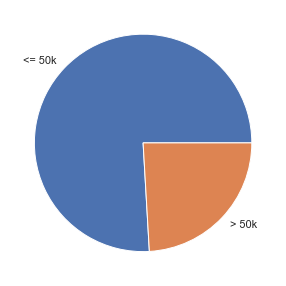

In [236]:
plt.figure(figsize = (5,5))
plt.pie(ddf['above-50k'].value_counts(), labels = ['<= 50k', '> 50k'])
plt.savefig('salary1.png')

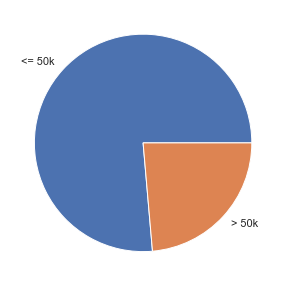

In [237]:
plt.figure(figsize = (5,5))
plt.pie(tdf['above-50k'].value_counts(), labels = ['<= 50k', '> 50k'])
plt.savefig('salary2.png')

Bar charts for education

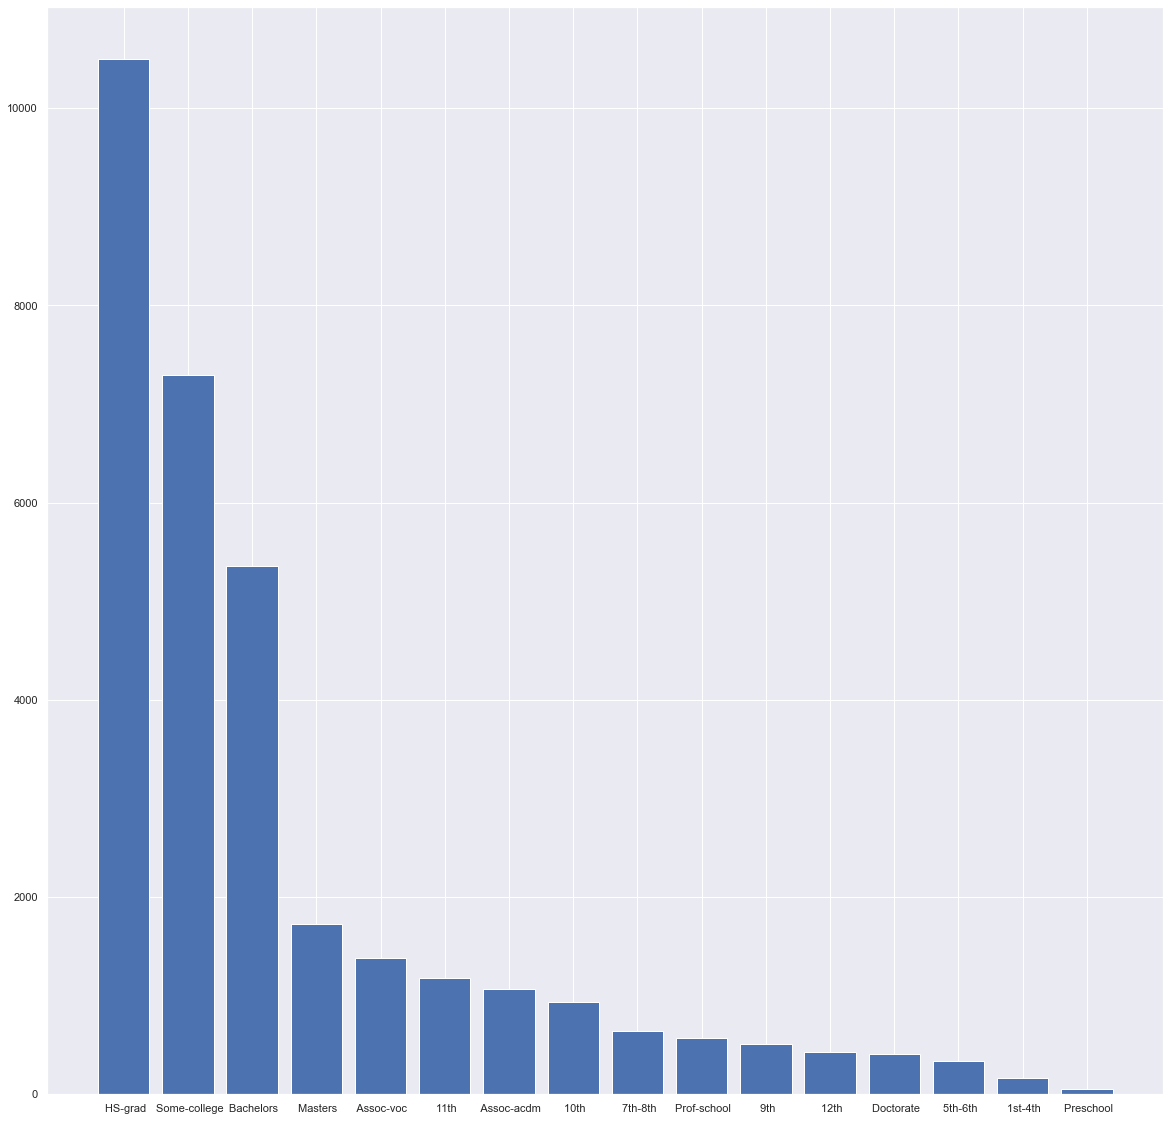

In [228]:
plt.figure(figsize = (20,20))
plt.bar(x = ddf['education'].value_counts().index, height =  ddf['education'].value_counts().values)
plt.savefig('education1.png')

Histograms for _ and _

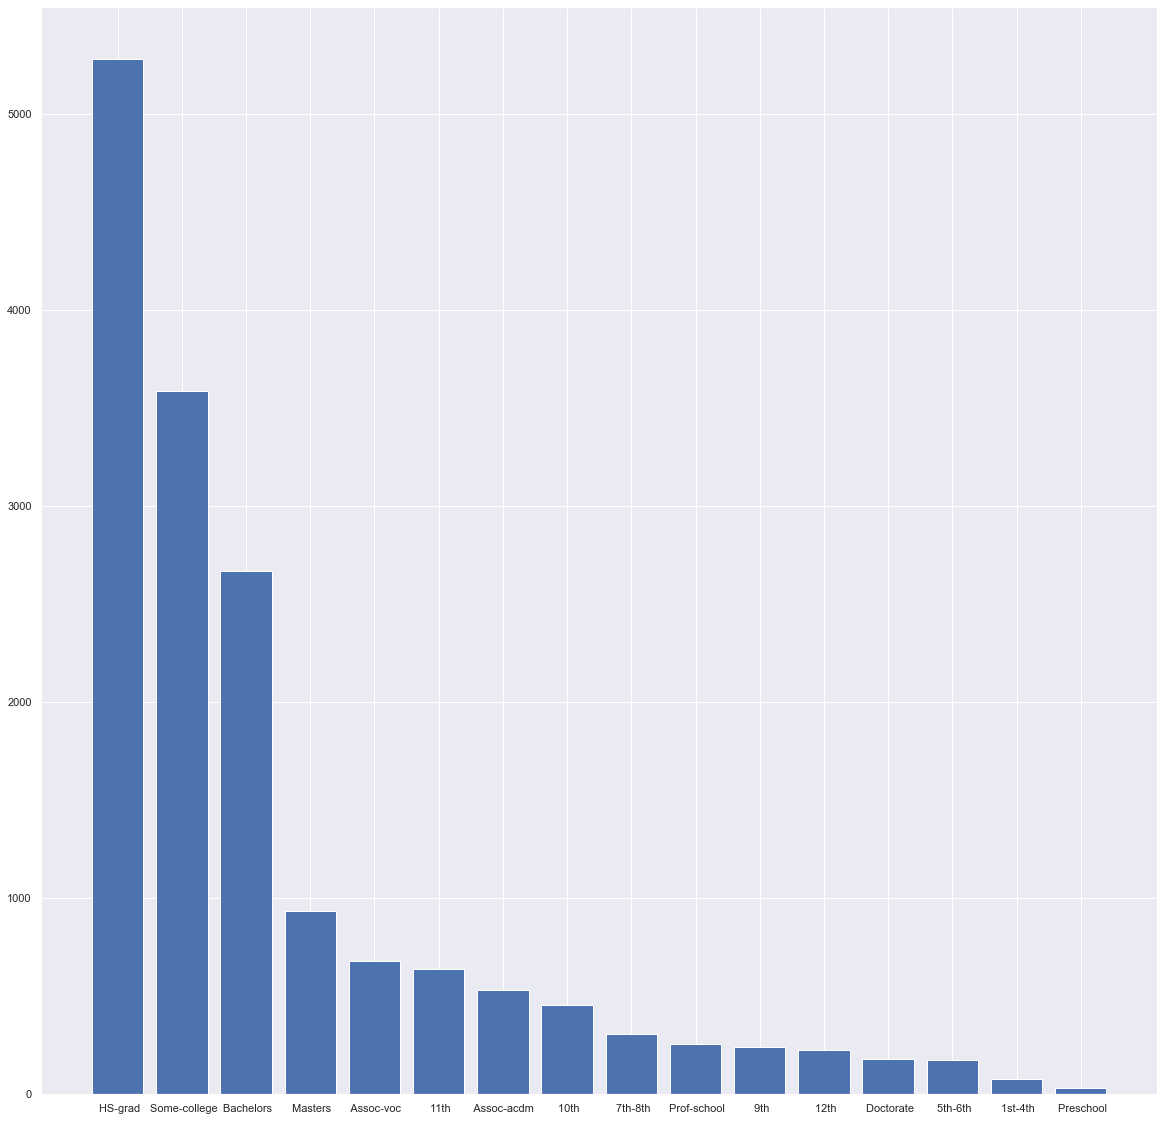

In [229]:
plt.figure(figsize = (20,20))
plt.bar(x = tdf['education'].value_counts().index, height =  tdf['education'].value_counts())
plt.savefig('education2.png')

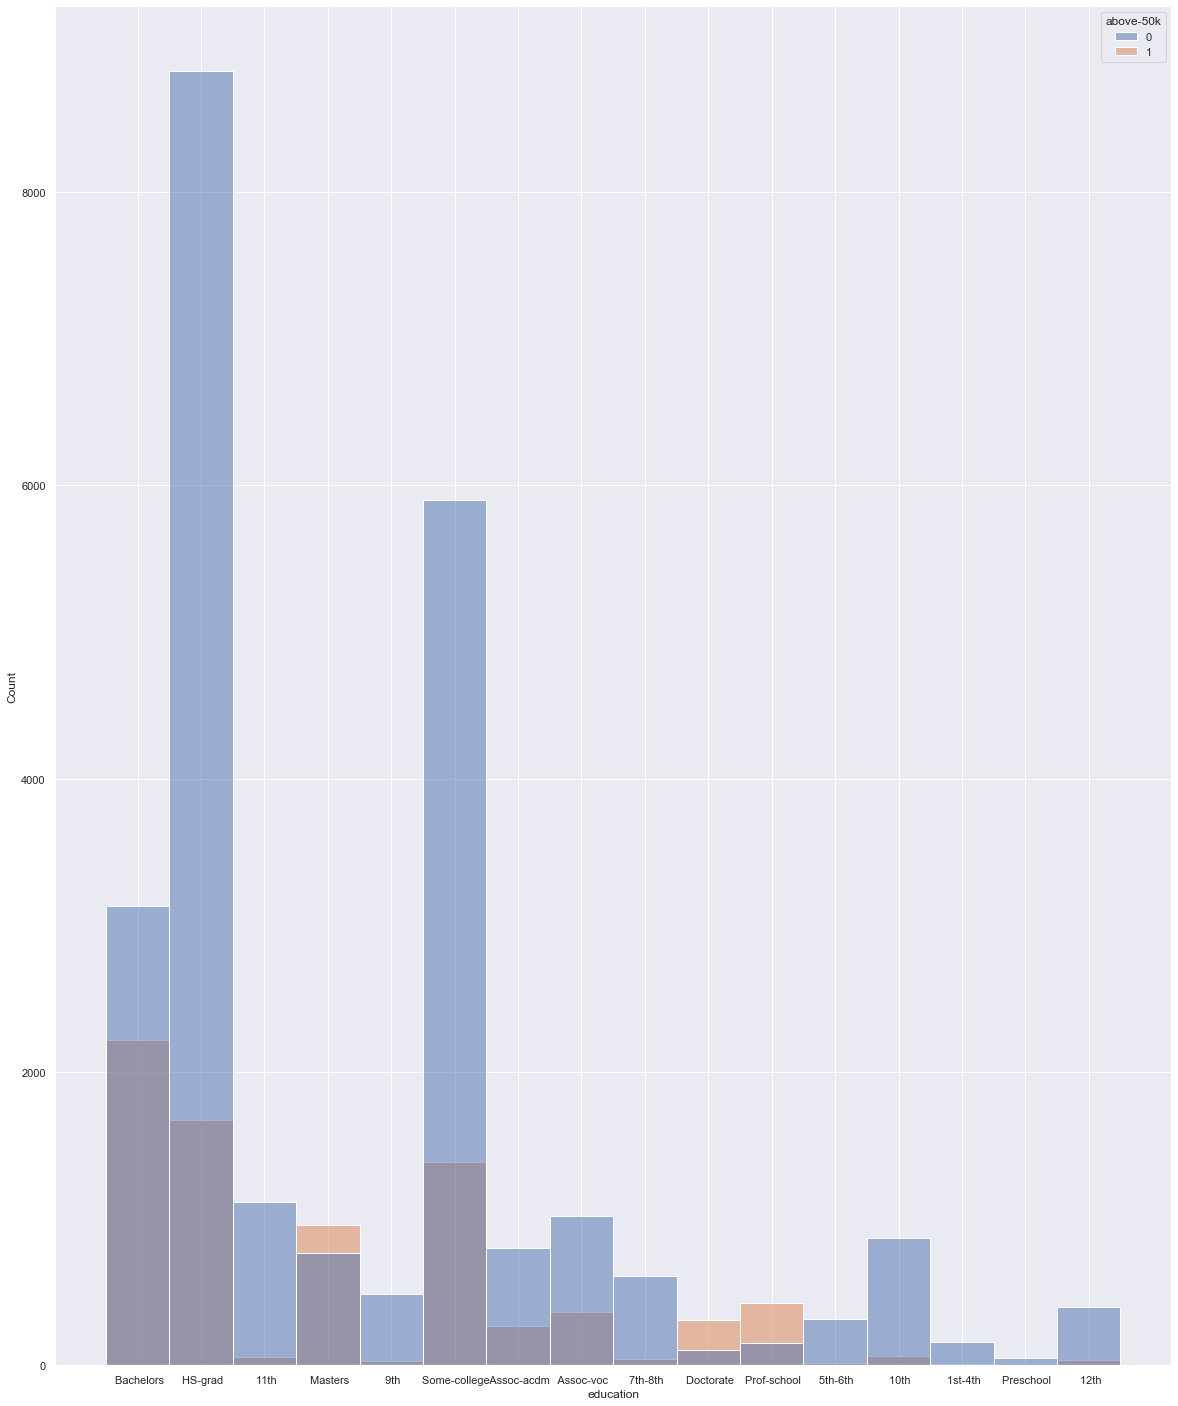

In [247]:
sns.set(rc={"figure.figsize":(20, 25)})
sns.histplot(data = ddf, x = 'education', hue = 'above-50k')
plt.savefig('education_and_salary1.png')

<AxesSubplot:xlabel='education', ylabel='Count'>

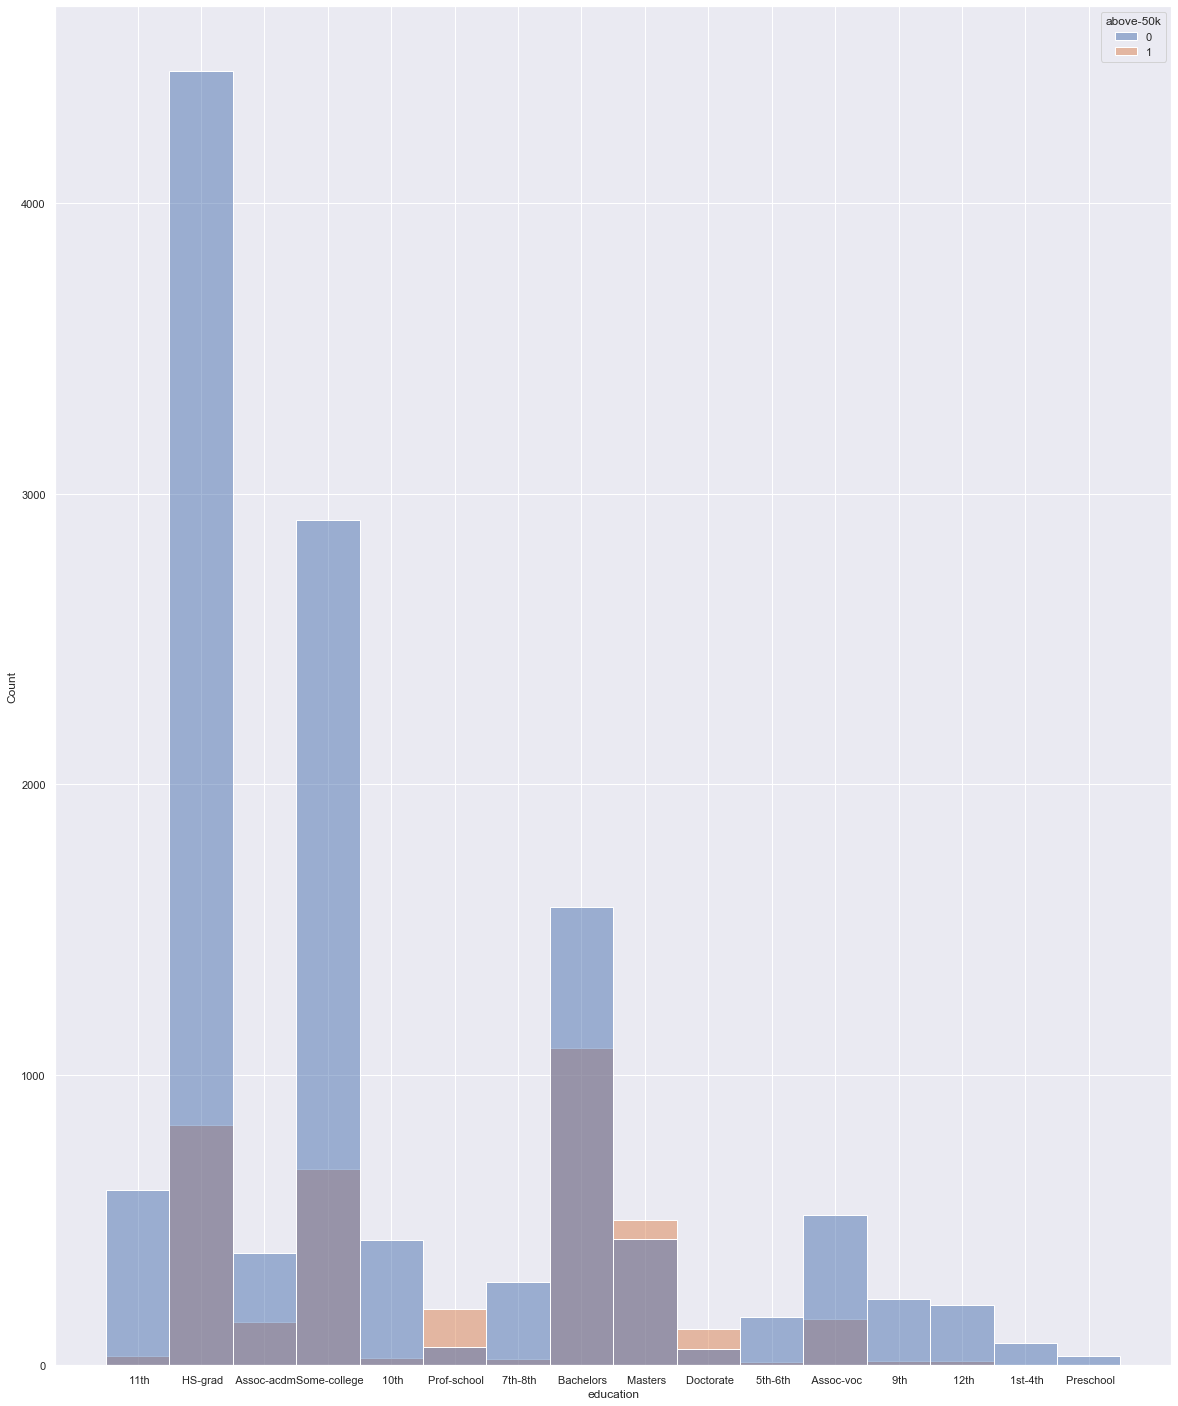

In [231]:
sns.set(rc={"figure.figsize":(20, 25)})
sns.histplot(data = tdf, x = 'education', hue = 'above-50k')

## Encoding

In [232]:
dec =pd.get_dummies(ddf)
tec =pd.get_dummies(tdf)

In [246]:
#setting up data and target values
X_train = dec.drop('above-50k', axis = 1)
X_test = tec.drop('above-50k', axis = 1)
y_train = dec['above-50k']
y_test = tec['above-50k']

## Modeling

### Classification

#### Decision Tree

Setup

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

Visualization

#### Naive Bayes

Setup

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

Accuracy

#### Random Forest

Setup

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

Visualization

#### Logistic Regression

Setup

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
lr_pred = lr.predict(X_test)
#set up accuracy score